In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.ensemble import ExtraTreesRegressor
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.neural_network import MLPRegressor
from sklearn.feature_selection import SelectKBest,mutual_info_regression
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn import preprocessing
from sklearn.metrics import r2_score

import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LeakyReLU,PReLU,ELU
from keras.layers import Dropout
from google.colab import files

In [2]:
uploaded = files.upload()
data = pd.read_csv("air_quality_index_dataset.csv")
data.head()

Saving air_quality_index_dataset.csv to air_quality_index_dataset (1).csv


T    TM   Tm     SLP     H   VV    V    VM      PM 2.5
0   7.4   9.8  4.8  1017.6  93.0  0.5  4.3   9.4  219.720833
1   7.8  12.7  4.4  1018.5  87.0  0.6  4.4  11.1  182.187500
2   6.7  13.4  2.4  1019.4  82.0  0.6  4.8  11.1  154.037500
3   8.6  15.5  3.3  1018.7  72.0  0.8  8.1  20.6  223.208333
4  12.4  20.9  4.4  1017.3  61.0  1.3  8.7  22.2  200.645833

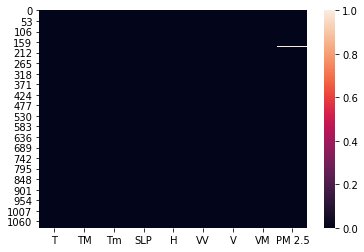

In [3]:
sns.heatmap(data.isnull())

In [4]:
data = data.dropna()

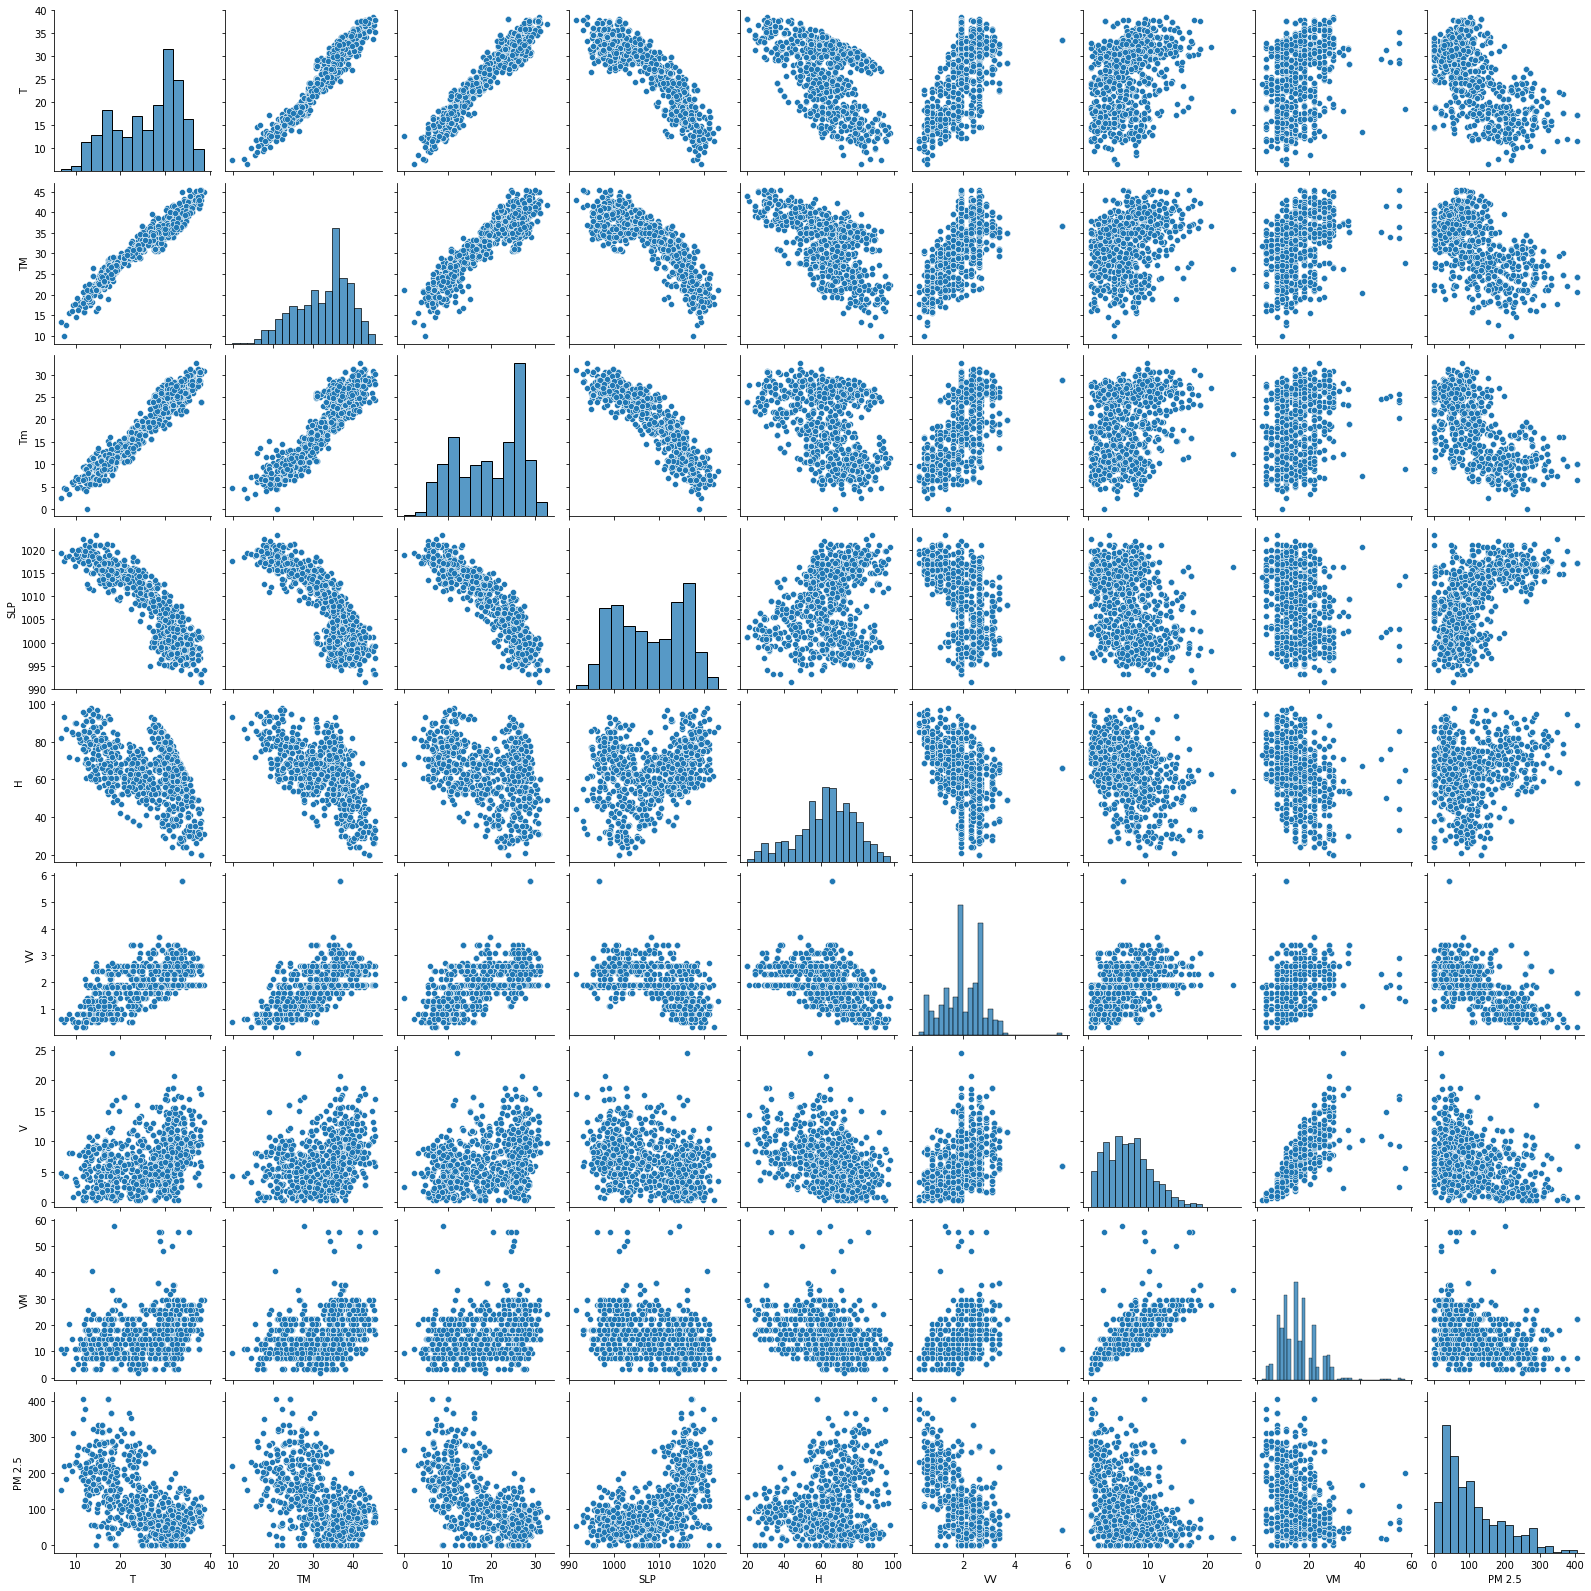

In [5]:
sns.pairplot(data)

In [6]:
ind_feat = data.iloc[:,:-1]
dep_feat = data.iloc[:,-1]
X_train, X_test, Y_train, Y_test = train_test_split(ind_feat, dep_feat, test_size=0.33, random_state=0)

In [7]:
regressor = ExtraTreesRegressor(n_estimators=600)
regressor.fit(X_train, Y_train)

ExtraTreesRegressor(bootstrap=False, ccp_alpha=0.0, criterion='mse',
                    max_depth=None, max_features='auto', max_leaf_nodes=None,
                    max_samples=None, min_impurity_decrease=0.0,
                    min_impurity_split=None, min_samples_leaf=1,
                    min_samples_split=2, min_weight_fraction_leaf=0.0,
                    n_estimators=600, n_jobs=None, oob_score=False,
                    random_state=None, verbose=0, warm_start=False)

In [8]:
X_Best = SelectKBest(mutual_info_regression, k=8).fit_transform(ind_feat, dep_feat)
print(X_Best.shape)
X_train, X_test, Y_train, Y_test = train_test_split(X_Best, dep_feat, test_size=0.33, random_state=0)
print(regressor.score(X_test,Y_test))
cross_val_score(regressor, X_train, Y_train, cv=8)

(1092, 8)
0.7973160622585815


array([0.82536671, 0.83426539, 0.82499457, 0.80906502, 0.82344732,
       0.8688809 , 0.7781928 , 0.74229712])

In [9]:

correlation_matrix = data.corr()
correlation_matrix

T        TM        Tm  ...         V        VM    PM 2.5
T       1.000000  0.967536  0.953719  ...  0.301994  0.287738 -0.631462
TM      0.967536  1.000000  0.892031  ...  0.292949  0.297011 -0.568409
Tm      0.953719  0.892031  1.000000  ...  0.296225  0.266782 -0.673824
SLP    -0.881409 -0.822958 -0.917518  ... -0.329838 -0.310704  0.623187
H      -0.509299 -0.586681 -0.287357  ... -0.380575 -0.362177  0.138005
VV      0.640792  0.606945  0.577240  ...  0.376873  0.342442 -0.573941
V       0.301994  0.292949  0.296225  ...  1.000000  0.775655 -0.268530
VM      0.287738  0.297011  0.266782  ...  0.775655  1.000000 -0.215854
PM 2.5 -0.631462 -0.568409 -0.673824  ... -0.268530 -0.215854  1.000000

[9 rows x 9 columns]

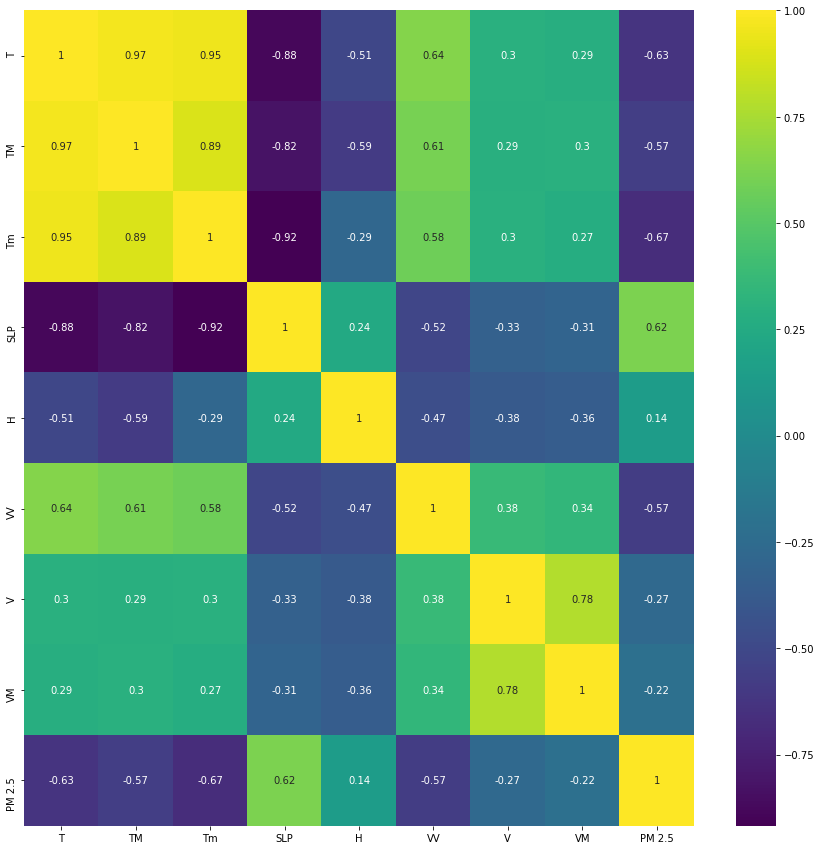

In [10]:
correlation_features = correlation_matrix.index
plt.figure(figsize=(15,15))
g=sns.heatmap(data[correlation_features].corr(),annot=True,cmap="viridis")

In [11]:
X_train, X_test, Y_train, Y_test = train_test_split(ind_feat, dep_feat, test_size=0.40, random_state=0)

In [18]:
neuralNetworkModel = Sequential()

neuralNetworkModel.add(Dense(128, kernel_initializer='normal',input_dim = X_train.shape[1], activation='relu'))
neuralNetworkModel.add(Dense(256, kernel_initializer='normal',activation='relu'))
neuralNetworkModel.add(Dense(256, kernel_initializer='normal',activation='relu'))
neuralNetworkModel.add(Dense(256, kernel_initializer='normal',activation='relu'))
neuralNetworkModel.add(Dense(256, kernel_initializer='normal',activation='relu'))
neuralNetworkModel.add(Dense(256, kernel_initializer='normal',activation='relu'))
neuralNetworkModel.add(Dense(1, kernel_initializer='normal',activation='linear'))

neuralNetworkModel.compile(loss='mean_absolute_error', optimizer='rmsprop', metrics=['mean_absolute_error'])
neuralNetworkModel.summary()

neuralNetworkModel.fit(X_train, Y_train,validation_split=0.30, batch_size = 10, epochs = 200)

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_14 (Dense)             (None, 128)               1152      
_________________________________________________________________
dense_15 (Dense)             (None, 256)               33024     
_________________________________________________________________
dense_16 (Dense)             (None, 256)               65792     
_________________________________________________________________
dense_17 (Dense)             (None, 256)               65792     
_________________________________________________________________
dense_18 (Dense)             (None, 256)               65792     
_________________________________________________________________
dense_19 (Dense)             (None, 256)               65792     
_________________________________________________________________
dense_20 (Dense)             (None, 1)                

In [19]:
prediction = neuralNetworkModel.predict(X_test)

In [20]:
metrics.mean_squared_error(Y_test, prediction)
r2_score(Y_test, prediction)

0.4729735420373903